<a href="https://colab.research.google.com/github/armawwnn/hate-offense-detector/blob/main/hatespeech_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##prepare data and env

In [ ]:
# install gdown import os and gdown
!pip install --quiet gdown
import gdown
import os

In [ ]:
#file from my googleDrive

download_url = "https://drive.google.com/uc?export=download&id=1PEWqdEQcElfObua2x6hblkwsCNClnqFn"



In [ ]:
#download dataset
output_path = "hate_speech_dataset.csv"

if not os.path.exists(output_path):
    print("Downloading dataset...")
    gdown.download(download_url, output_path, quiet=False)
else:
    print(f"{output_path} already exists, skipping download.")

Downloading...
From: https://drive.google.com/uc?export=download&id=1PEWqdEQcElfObua2x6hblkwsCNClnqFn
To: /content/hate_speech_dataset.csv
100%|██████████| 2.55M/2.55M [00:00<00:00, 113MB/s]


In [ ]:
# 1) Imports
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from numpy.linalg import inv, det
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import KFold
from numpy.linalg import inv, det





In [ ]:
# 2) Load your CSV (adjust path if needed)
df = pd.read_csv('/content/hate_speech_dataset.csv')

# 3) Text cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+','', text)
    text = re.sub(r'@\w+','', text)
    text = re.sub(r'[^a-z\s]','', text)
    return re.sub(r'\s+',' ', text).strip()
df['clean_tweet'] = df['tweet'].apply(clean_text)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
 7   clean_tweet         24783 non-null  object
dtypes: int64(6), object(2)
memory usage: 1.5+ MB


In [ ]:
# tweet after clean it
print(df['clean_tweet'][0])
print('\n')
print(df['tweet'][0])


rt as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out


!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...


In [ ]:
# TF‑IDF → SVD
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_text = vectorizer.fit_transform(df['clean_tweet'])
svd = TruncatedSVD(n_components=100, random_state=42)
X_svd = svd.fit_transform(X_text)


In [ ]:
#vectorize each tweet to 5000 numeric values
first_dense = X_text[0].toarray()[0]
print(first_dense)
print("Length:", len(first_dense))

[0. 0. 0. ... 0. 0. 0.]
Length: 5000


In [ ]:
# tweet after convert it to vector 100‑dim
print( X_svd[0])
print(len( X_svd[0]))
print("First row shape:", X_svd[0].shape)  # (100,)


[ 7.76101203e-02 -8.83850407e-02 -1.25225493e-02  5.32437488e-03
 -2.17482566e-04  1.38105613e-01  1.59359851e-01 -7.82194907e-02
 -2.74549996e-02 -4.46831829e-02  1.96372338e-02 -1.95987852e-02
  1.69065802e-03 -1.43113855e-02  1.59393477e-02 -1.27941950e-03
 -5.58998941e-03 -2.17503459e-03  2.91029355e-03  7.64583858e-03
 -7.92581839e-03 -1.08875597e-02  3.23460051e-02  2.25406530e-02
  1.06897993e-03  3.79787719e-02  2.33683538e-02  2.06057424e-02
 -4.63405126e-02 -7.81011920e-02 -1.03031699e-01 -1.08787912e-01
 -9.82430076e-02 -7.13745475e-03 -4.88009143e-02  8.07427496e-02
 -2.15967546e-02  7.54758881e-03 -8.91092170e-03 -6.82270148e-03
  4.12119553e-02  5.20178260e-02 -1.82944535e-02 -1.38883888e-02
 -1.33419890e-02 -7.96773538e-02  8.70166140e-02 -1.06420549e-01
 -3.93430129e-03  1.31711347e-01 -7.77887143e-02  5.77665831e-02
 -1.85333831e-02 -5.51399227e-02 -3.00678362e-02  3.43662287e-02
 -8.56270021e-03  5.10854695e-03 -2.74071712e-02 -8.29218253e-03
 -5.66514992e-02 -1.31623

In [ ]:

X = X_svd
y = df['class'].values

In [ ]:
print(X[0])
print(y[0])

[ 7.76101203e-02 -8.83850407e-02 -1.25225493e-02  5.32437488e-03
 -2.17482566e-04  1.38105613e-01  1.59359851e-01 -7.82194907e-02
 -2.74549996e-02 -4.46831829e-02  1.96372338e-02 -1.95987852e-02
  1.69065802e-03 -1.43113855e-02  1.59393477e-02 -1.27941950e-03
 -5.58998941e-03 -2.17503459e-03  2.91029355e-03  7.64583858e-03
 -7.92581839e-03 -1.08875597e-02  3.23460051e-02  2.25406530e-02
  1.06897993e-03  3.79787719e-02  2.33683538e-02  2.06057424e-02
 -4.63405126e-02 -7.81011920e-02 -1.03031699e-01 -1.08787912e-01
 -9.82430076e-02 -7.13745475e-03 -4.88009143e-02  8.07427496e-02
 -2.15967546e-02  7.54758881e-03 -8.91092170e-03 -6.82270148e-03
  4.12119553e-02  5.20178260e-02 -1.82944535e-02 -1.38883888e-02
 -1.33419890e-02 -7.96773538e-02  8.70166140e-02 -1.06420549e-01
 -3.93430129e-03  1.31711347e-01 -7.77887143e-02  5.77665831e-02
 -1.85333831e-02 -5.51399227e-02 -3.00678362e-02  3.43662287e-02
 -8.56270021e-03  5.10854695e-03 -2.74071712e-02 -8.29218253e-03
 -5.66514992e-02 -1.31623

In [ ]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
reg_param = 1e-6
classes, counts = np.unique(y_train, return_counts=True)
n_classes      = len(classes)
n_samples, n_features = X_train.shape

In [ ]:
print(f'we have {n_classes} class')
print(f'we have {n_samples} train data ')
print(f'each one has {n_features} features')

we have 3 class
we have 19826 train data 
each one has 100 features


In [ ]:
# — 2) Compute priors and class means
priors = counts / n_samples            # π_i
means  = np.zeros((n_classes, n_features))
for idx, cls in enumerate(classes):
    means[idx] = X_train[y_train == cls].mean(axis=0)

In [ ]:
priors # π_i

array([0.05770201, 0.77433673, 0.16796126])

In [ ]:
print(means[0]) #meau class 0 100d
print(len(means[0]))

[ 6.88158730e-02 -3.59111676e-02 -3.82256028e-03  8.72923631e-03
  4.18876590e-03 -1.42543655e-03  4.33307535e-02 -1.12639993e-02
 -1.55211914e-04  2.44575218e-02 -1.99018256e-02  2.09837074e-02
  8.41701512e-03  8.67466801e-03  1.74905743e-03 -1.89021034e-02
  4.88024669e-02 -1.69274376e-02 -5.77892104e-03 -1.97425986e-02
 -4.07686660e-03 -2.39710204e-03  1.20357700e-02 -4.15132177e-03
  5.23391113e-03  8.66930307e-03  9.48898436e-03  2.09306813e-02
  9.93560969e-03 -1.65449374e-03 -8.57253686e-03 -3.65780463e-03
  1.34251953e-03 -3.55815201e-03  1.52271992e-02  4.80836557e-03
  7.44887829e-03  3.56734535e-03 -3.19844462e-03 -9.74779399e-03
 -1.73231087e-02 -4.76983451e-03 -2.71451316e-03 -1.79057203e-02
  1.20620797e-03 -1.46045590e-02 -6.07016379e-03 -8.20046827e-03
 -2.32306716e-03 -8.95039885e-03 -6.45884089e-04  2.94685192e-03
  2.46585295e-03  2.07396560e-04  1.24469963e-03 -9.46430598e-03
  1.09678952e-02  5.30841810e-04  6.85700512e-03 -6.77281795e-04
  3.39983575e-03 -3.55302

In [ ]:

#calc covariance matris
covariances = np.zeros((n_classes, n_features, n_features))
for idx, cls in enumerate(classes):
    Xc = X_train[y_train == cls]
    covariances[idx] = np.cov(Xc, rowvar=False) \
                       + reg_param * np.eye(n_features)


In [ ]:
covariances[0] #matris 100X100

array([[ 5.21448678e-03, -2.42819910e-04, -2.84226385e-04, ...,
        -1.32486562e-04,  6.15237791e-05,  1.51740832e-05],
       [-2.42819910e-04,  4.07227978e-03,  2.93601453e-04, ...,
         6.07263634e-06, -4.98643951e-05, -4.20123190e-05],
       [-2.84226385e-04,  2.93601453e-04,  2.26843431e-03, ...,
        -2.51385192e-05,  2.36215015e-06, -3.24081267e-06],
       ...,
       [-1.32486562e-04,  6.07263634e-06, -2.51385192e-05, ...,
         8.20298198e-04,  4.60721626e-06,  8.89894664e-05],
       [ 6.15237791e-05, -4.98643951e-05,  2.36215015e-06, ...,
         4.60721626e-06,  9.05810025e-04,  2.21931695e-05],
       [ 1.51740832e-05, -4.20123190e-05, -3.24081267e-06, ...,
         8.89894664e-05,  2.21931695e-05,  1.14227588e-03]])

In [ ]:
inv_covs = [inv(covariances[i]) for i in range(n_classes)]
log_dets = [np.log(det(covariances[i])) for i in range(n_classes)]

##Quadratic discriminant

In [ ]:
def qda_scores(x):

    return np.array([
        -0.5 * log_dets[i]
        -0.5 * (
            x @ inv_covs[i] @ x
            - 2 * (x @ inv_covs[i] @ means[i])
            + (means[i] @ inv_covs[i] @ means[i])
        )
        + np.log(priors[i])
        for i in range(n_classes)
    ])

In [ ]:
y_pred_qda = np.array([classes[np.argmax(qda_scores(x))] for x in X_test])


In [ ]:
print("QDA Report:\n", classification_report(y_test, y_pred_qda, digits=4))


QDA Report:
               precision    recall  f1-score   support

           0     0.1327    0.5035    0.2101       286
           1     0.9502    0.6021    0.7372      3838
           2     0.5292    0.9148    0.6705       833

    accuracy                         0.6490      4957
   macro avg     0.5374    0.6735    0.5392      4957
weighted avg     0.8323    0.6490    0.6955      4957



In [ ]:
#10 fold
def qda_10fold(X, y, n_classes, priors, means, covariances, reg_param=1e-6):

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    fold = 1
    accuracies = []


    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]


        classes = np.unique(y_train)
        counts = np.bincount(y_train)
        n_samples, n_features = X_train.shape

        means_fold = np.zeros((n_classes, n_features))
        for idx, cls in enumerate(classes):
            means_fold[idx] = X_train[y_train == cls].mean(axis=0)

        priors_fold = counts / n_samples

        covariances_fold = np.zeros((n_classes, n_features, n_features))
        for idx, cls in enumerate(classes):
            Xc = X_train[y_train == cls]
            covariances_fold[idx] = np.cov(Xc, rowvar=False) + reg_param * np.eye(n_features)


        y_pred = np.array([classes[np.argmax(qda_scores(x))] for x in X_test])


        print(f"\nFold {fold}:")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))


        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

        fold += 1

    # Print  cross-validation results
    print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
    print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")


In [ ]:
qda_10fold(X, y, n_classes=3, priors=priors, means=means, covariances=covariances)



Fold 1:
Classification Report:
              precision    recall  f1-score   support

           0     0.1590    0.5488    0.2466       164
           1     0.9573    0.5890    0.7293      1905
           2     0.5115    0.9244    0.6586       410

    accuracy                         0.6418      2479
   macro avg     0.5426    0.6874    0.5448      2479
weighted avg     0.8308    0.6418    0.6857      2479

Confusion Matrix:
[[  90   34   40]
 [ 461 1122  322]
 [  15   16  379]]

Fold 2:
Classification Report:
              precision    recall  f1-score   support

           0     0.1221    0.4961    0.1960       127
           1     0.9626    0.6144    0.7501      1927
           2     0.5239    0.9035    0.6632       425

    accuracy                         0.6579      2479
   macro avg     0.5362    0.6713    0.5364      2479
weighted avg     0.8443    0.6579    0.7068      2479

Confusion Matrix:
[[  63   23   41]
 [ 435 1184  308]
 [  18   23  384]]

Fold 3:
Classification Repo

In [ ]:
s2 = np.mean(np.diag(S))

In [ ]:
S = np.zeros((n_features, n_features))
for idx, cls in enumerate(classes):
    Xc = X_train[y_train == cls] - means[idx]
    S += Xc.T @ Xc
S /= (n_samples - n_classes)
inv_S = inv(S)

##Linear *discriminant*

In [ ]:
def lda_scores(x):

    return np.array([
        x @ inv_S @ means[i]
        - 0.5 * (means[i] @ inv_S @ means[i])
        + np.log(priors[i])
        for i in range(n_classes)
    ])


In [ ]:
y_pred_lda = np.array([classes[np.argmax(lda_scores(x))] for x in X_test])


In [ ]:
print("LDA Report:\n", classification_report(y_test, y_pred_lda, digits=4))


LDA Report:
               precision    recall  f1-score   support

           0     0.4064    0.2657    0.3214       286
           1     0.8512    0.9497    0.8978      3838
           2     0.7971    0.4670    0.5889       833

    accuracy                         0.8291      4957
   macro avg     0.6849    0.5608    0.6027      4957
weighted avg     0.8165    0.8291    0.8126      4957



In [ ]:
def lda_10fold(X, y, n_classes, reg_param=1e-6):

    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    fold = 1
    accuracies = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]


        classes = np.unique(y_train)
        counts = np.bincount(y_train)
        n_samples, n_features = X_train.shape

        means = np.zeros((n_classes, n_features))
        for idx, cls in enumerate(classes):
            means[idx] = X_train[y_train == cls].mean(axis=0)

        priors = counts / n_samples

        S = np.zeros((n_features, n_features))
        for idx, cls in enumerate(classes):
            Xc = X_train[y_train == cls] - means[idx]
            S += Xc.T @ Xc
        S /= (n_samples - n_classes)

        S += reg_param * np.eye(n_features)


        inv_S = np.linalg.inv(S)


        y_pred = []
        for x in X_test:

            scores = np.array([
                -0.5 * np.log(np.linalg.det(S))
                - 0.5 * (x - means[i]).T @ inv_S @ (x - means[i])
                + np.log(priors[i])
                for i in range(n_classes)
            ])
            y_pred.append(classes[np.argmax(scores)])

        print(f"\nFold {fold}:")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        accuracy = np.mean(np.array(y_pred) == y_test)
        accuracies.append(accuracy)

        fold += 1

    print(f"\nAverage Accuracy: {np.mean(accuracies):.4f}")
    print(f"Standard Deviation of Accuracy: {np.std(accuracies):.4f}")


In [ ]:
lda_10fold(X, y, n_classes=3)


Fold 1:
Classification Report:
              precision    recall  f1-score   support

           0     0.4667    0.2988    0.3643       164
           1     0.8498    0.9533    0.8986      1905
           2     0.8059    0.4659    0.5904       410

    accuracy                         0.8294      2479
   macro avg     0.7075    0.5726    0.6178      2479
weighted avg     0.8172    0.8294    0.8123      2479

Confusion Matrix:
[[  49  107    8]
 [  51 1816   38]
 [   5  214  191]]

Fold 2:
Classification Report:
              precision    recall  f1-score   support

           0     0.4124    0.3150    0.3571       127
           1     0.8568    0.9502    0.9011      1927
           2     0.8041    0.4635    0.5881       425

    accuracy                         0.8342      2479
   macro avg     0.6911    0.5762    0.6154      2479
weighted avg     0.8250    0.8342    0.8196      2479

Confusion Matrix:
[[  40   80    7]
 [  55 1831   41]
 [   2  226  197]]

Fold 3:
Classification Repo

##nive_bayes

In [ ]:
s= np.sqrt(np.diag(S))

In [ ]:
def nive_bayes(x):
    """Diagonal‐covariance (naive) discriminant."""
    return np.array([
        -0.5 * np.sum(((x - means[i]) / s) ** 2)
        + np.log(priors[i])
        for i in range(n_classes)
    ])

In [ ]:
y_pred_nive = np.array([classes[np.argmax(nive_bayes(x))] for x in X_test])


In [ ]:
print("NIVE Report:\n", classification_report(y_test, y_pred_nive, digits=4))


NIVE Report:
               precision    recall  f1-score   support

           0     0.4190    0.2622    0.3226       286
           1     0.8431    0.9547    0.8954      3838
           2     0.8079    0.4190    0.5518       833

    accuracy                         0.8247      4957
   macro avg     0.6900    0.5453    0.5899      4957
weighted avg     0.8127    0.8247    0.8046      4957



In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
all_y_true = []
all_y_pred = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    classes, counts = np.unique(y_train, return_counts=True)
    n_classes = len(classes)
    n_features = X.shape[1]
    reg_param = 1e-6

    priors = counts / len(y_train)

    means = np.zeros((n_classes, n_features))
    for i, cls in enumerate(classes):
        means[i] = X_train[y_train == cls].mean(axis=0)

    s = X_train.std(axis=0) + reg_param  # Add reg_param to avoid division by 0

    def diag_scores(x):
        return np.array([
            -0.5 * np.sum(((x - means[i]) / s) ** 2) + np.log(priors[i])
            for i in range(n_classes)
        ])

    y_pred = np.array([classes[np.argmax(diag_scores(x))] for x in X_test])
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"\n=== Fold {fold + 1} ===")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

print("\n=== Overall Report (10-Fold CV) ===")
print(classification_report(all_y_true, all_y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))


=== Fold 1 ===
              precision    recall  f1-score   support

           0     0.4615    0.2927    0.3582       164
           1     0.8398    0.9549    0.8936      1905
           2     0.8134    0.4146    0.5493       410

    accuracy                         0.8217      2479
   macro avg     0.7049    0.5541    0.6004      2479
weighted avg     0.8104    0.8217    0.8013      2479

Confusion Matrix:
[[  48  112    4]
 [  51 1819   35]
 [   5  235  170]]

=== Fold 2 ===
              precision    recall  f1-score   support

           0     0.3977    0.2756    0.3256       127
           1     0.8446    0.9564    0.8971      1927
           2     0.8134    0.4000    0.5363       425

    accuracy                         0.8261      2479
   macro avg     0.6853    0.5440    0.5863      2479
weighted avg     0.8164    0.8261    0.8059      2479

Confusion Matrix:
[[  35   86    6]
 [  51 1843   33]
 [   2  253  170]]

=== Fold 3 ===
              precision    recall  f1-score 

##Spherical‐covariance Gaussian

In [ ]:
s2 = np.mean(np.diag(S))

In [ ]:
def sph_scores(x):

    return np.array([
        -0.5 / s2 * np.sum((x - means[i])**2)
        + np.log(priors[i])
        for i in range(n_classes)
    ])

In [ ]:
y_pred_sph = np.array([classes[np.argmax(sph_scores(x))] for x in X_test])


In [ ]:
print("sph Report:\n", classification_report(y_test, y_pred_sph, digits=4))


sph Report:
               precision    recall  f1-score   support

           0     0.3333    0.2742    0.3009       124
           1     0.9330    0.9104    0.9216      1942
           2     0.7173    0.8374    0.7727       412

    accuracy                         0.8664      2478
   macro avg     0.6612    0.6740    0.6650      2478
weighted avg     0.8671    0.8664    0.8657      2478



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classes, counts = np.unique(y_train, return_counts=True)
    n_classes = len(classes)
    n_samples, n_features = X_train.shape

    priors = counts / n_samples
    means = np.zeros((n_classes, n_features))
    for idx, cls in enumerate(classes):
        means[idx] = X_train[y_train == cls].mean(axis=0)

    S = np.zeros((n_features, n_features))
    for idx, cls in enumerate(classes):
        Xc = X_train[y_train == cls] - means[idx]
        S += Xc.T @ Xc
    S /= (n_samples - n_classes)

    s2 = np.mean(np.diag(S))

    def sph_scores(x):
        return np.array([
            -0.5 / s2 * np.sum((x - means[i]) ** 2) + np.log(priors[i])
            for i in range(n_classes)
        ])

    y_pred = np.array([
        classes[np.argmax(sph_scores(x))] for x in X_test
    ])

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"\n=== Fold {fold+1} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

print("\n=== Overall Performance ===")
print(classification_report(all_y_true, all_y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))



=== Fold 1 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.4196    0.2866    0.3406       164
           1     0.9103    0.9160    0.9131      1905
           2     0.7111    0.7805    0.7442       410

    accuracy                         0.8520      2479
   macro avg     0.6803    0.6610    0.6660      2479
weighted avg     0.8449    0.8520    0.8473      2479

Confusion Matrix:
[[  47   86   31]
 [  61 1745   99]
 [   4   86  320]]

=== Fold 2 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.3789    0.2835    0.3243       127
           1     0.9242    0.9113    0.9177      1927
           2     0.6921    0.7882    0.7371       425

    accuracy                         0.8580      2479
   macro avg     0.6651    0.6610    0.6597      2479
weighted avg     0.8565    0.8580    0.8563      2479

Confusion Matrix:
[[  36   57   34]
 [  56 1756  115]
 [   3   87  335]]

=== Fold 3 ==

##Nearest Mean Classifier

In [ ]:
def nmc_scores(x, means):
    return np.array([
        -np.sum((x - means[i]) ** 2)  # negative for compatibility with argmax
        for i in range(len(means))
    ])

In [ ]:
y_pred_nmc = np.array([classes[np.argmax(nmc_scores(x, means))] for x in X_test])



In [ ]:
print("nmc Report:\n", classification_report(y_test, y_pred_nmc, digits=4))


nmc Report:
               precision    recall  f1-score   support

           0     0.2262    0.4032    0.2899       124
           1     0.9706    0.7992    0.8766      1942
           2     0.6033    0.9636    0.7421       412

    accuracy                         0.8067      2478
   macro avg     0.6001    0.7220    0.6362      2478
weighted avg     0.8723    0.8067    0.8249      2478



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classes = np.unique(y_train)
    n_classes = len(classes)
    n_features = X_train.shape[1]

    means = np.zeros((n_classes, n_features))
    for idx, cls in enumerate(classes):
        means[idx] = X_train[y_train == cls].mean(axis=0)

    def nmc_scores(x):
        return np.array([
            -np.sum((x - means[i]) ** 2)
            for i in range(n_classes)
        ])


    y_pred = np.array([
        classes[np.argmax(nmc_scores(x))] for x in X_test
    ])

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"\n=== Fold {fold+1} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


print("\n=== Overall Performance ===")
print(classification_report(all_y_true, all_y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))



=== Fold 1 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.3197    0.4756    0.3824       164
           1     0.9711    0.8110    0.8839      1905
           2     0.6009    0.9439    0.7343       410

    accuracy                         0.8108      2479
   macro avg     0.6306    0.7435    0.6669      2479
weighted avg     0.8668    0.8108    0.8260      2479

Confusion Matrix:
[[  78   32   54]
 [ 157 1545  203]
 [   9   14  387]]

=== Fold 2 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.2278    0.4252    0.2967       127
           1     0.9765    0.7966    0.8774      1927
           2     0.5970    0.9412    0.7306       425

    accuracy                         0.8023      2479
   macro avg     0.6004    0.7210    0.6349      2479
weighted avg     0.8731    0.8023    0.8225      2479

Confusion Matrix:
[[  54   25   48]
 [ 170 1535  222]
 [  13   12  400]]

=== Fold 3 ==

##Template Matching

In [ ]:
def template_matching_scores(x, means):
    return np.array([
        means[i] @ x for i in range(len(means))
    ])

In [ ]:
y_pred_template = np.array([
    classes[np.argmax(template_matching_scores(x, means))] for x in X_test
])


In [ ]:
print("template Report:\n", classification_report(y_test, y_pred_template, digits=4))


template Report:
               precision    recall  f1-score   support

           0     0.2079    0.4677    0.2878       124
           1     0.9152    0.8836    0.8991      1942
           2     0.8148    0.6408    0.7174       412

    accuracy                         0.8224      2478
   macro avg     0.6460    0.6640    0.6348      2478
weighted avg     0.8631    0.8224    0.8383      2478



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

kf = KFold(n_splits=10, shuffle=True, random_state=42)

all_y_true = []
all_y_pred = []

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    classes = np.unique(y_train)
    n_classes = len(classes)
    n_features = X_train.shape[1]

    means = np.zeros((n_classes, n_features))
    for idx, cls in enumerate(classes):
        means[idx] = X_train[y_train == cls].mean(axis=0)

    def template_matching_scores(x):
        return np.array([
            means[i] @ x for i in range(n_classes)
        ])

    y_pred = np.array([
        classes[np.argmax(template_matching_scores(x))] for x in X_test
    ])

    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    print(f"\n=== Fold {fold+1} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

print("\n=== Overall Performance ===")
print(classification_report(all_y_true, all_y_pred, digits=4))
print("Confusion Matrix:")
print(confusion_matrix(all_y_true, all_y_pred))



=== Fold 1 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.2993    0.5183    0.3795       164
           1     0.8977    0.8887    0.8932      1905
           2     0.7605    0.5732    0.6537       410

    accuracy                         0.8120      2479
   macro avg     0.6525    0.6601    0.6421      2479
weighted avg     0.8354    0.8120    0.8196      2479

Confusion Matrix:
[[  85   64   15]
 [ 153 1693   59]
 [  46  129  235]]

=== Fold 2 ===
Classification Report:
              precision    recall  f1-score   support

           0     0.2384    0.5276    0.3284       127
           1     0.9119    0.8812    0.8963      1927
           2     0.7917    0.6259    0.6991       425

    accuracy                         0.8193      2479
   macro avg     0.6473    0.6782    0.6413      2479
weighted avg     0.8568    0.8193    0.8334      2479

Confusion Matrix:
[[  67   44   16]
 [ 175 1698   54]
 [  39  120  266]]

=== Fold 3 ==

##test a tweet

In [ ]:
# test a tweet
tweet = "All people from ... are disgusting and shouldn't be allowed here"

In [ ]:

#clan it
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+|[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

tweet_cleaned = clean_text(tweet)

#vectorize it
tweet_vec = vectorizer.transform([tweet_cleaned])
tweet_svd = svd.transform(tweet_vec)

In [ ]:
x = tweet_svd[0]
scores = nive_bayes(x)
predicted_class = classes[np.argmax(scores)]
print(f"\nTweet: \"{tweet}\"")
class_names = {0: "Hate Speech", 1: "Offensive Language", 2: "Neither"}
print(f"Predicted class (nive bayes): {predicted_class} -> {class_names[predicted_class]}")



Tweet: "All people from ... are disgusting and shouldn't be allowed here"
Predicted class (nive bayes): 1 -> Offensive Language


##Histogram estimation

Histogram classifier accuracy (h=0.2): 0.123


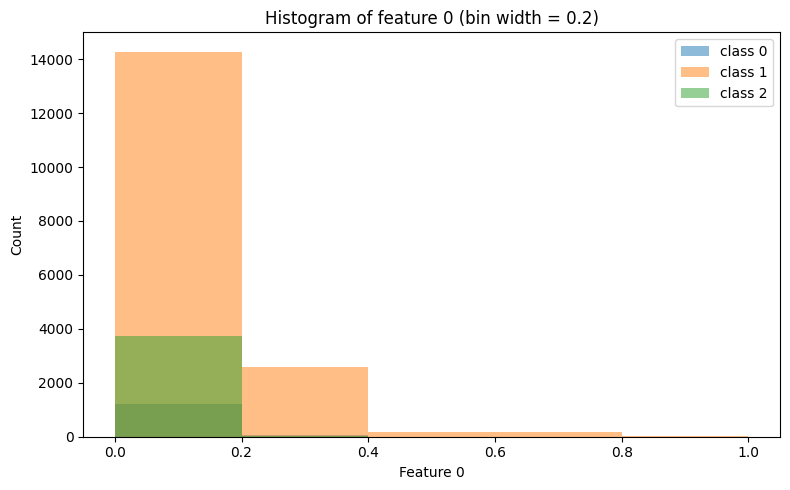

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

h = 0.2  # your bin width
classes = np.unique(y_train)


y_pred = np.array([
    classes[np.argmax(histogram_scores(x, X_train, y_train, classes, h))]
    for x in X_test
])


acc = accuracy_score(y_test, y_pred)
print(f'Histogram classifier accuracy (h={h}): {acc:.3f}')

feature_idx = 0
bin_edges = np.arange(
    X_train[:, feature_idx].min(),
    X_train[:, feature_idx].max() + h,
    h
)

plt.figure(figsize=(8, 5))
for c in classes:
    plt.hist(
        X_train[y_train == c, feature_idx],
        bins=bin_edges,
        alpha=0.5,
        label=f'class {c}'
    )

plt.title(f'Histogram of feature {feature_idx} (bin width = {h})')
plt.xlabel(f'Feature {feature_idx}')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


##Navie estimator(Parzen‐window)

Parzen‐window histogram accuracy (h=0.2): 0.525


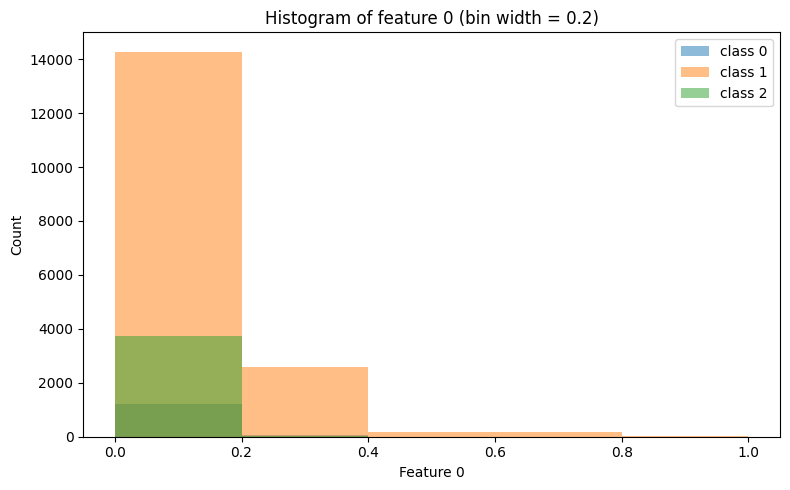

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def parzen_scores(x, X_train, y_train, classes, h):

    d      = X_train.shape[1]
    g_vals = np.empty(len(classes), dtype=float)

    for i, c in enumerate(classes):
        X_c = X_train[y_train == c]
        N_c = len(X_c)
        # count training points in the d‐dimensional window
        inside = np.all(np.abs(X_c - x) <= (h/2), axis=1)
        count  = inside.sum()

        # density & prior
        p_x_given_c = count / (N_c * (h**d))
        p_c         = N_c / len(X_train)
        g_vals[i]   = p_x_given_c * p_c

    return g_vals

h       = 0.2
classes = np.unique(y_train)

y_pred = np.array([
    classes[np.argmax(parzen_scores(x, X_train, y_train, classes, h))]
    for x in X_test
])

acc = accuracy_score(y_test, y_pred)
print(f'Parzen‐window histogram accuracy (h={h}): {acc:.3f}')


feature_idx = 0
bin_edges   = np.arange(
    X_train[:, feature_idx].min(),
    X_train[:, feature_idx].max() + h,
    h
)

plt.figure(figsize=(8, 5))
for c in classes:
    plt.hist(
        X_train[y_train == c, feature_idx],
        bins=bin_edges,
        alpha=0.5,
        label=f'class {c}'
    )

plt.title(f'Histogram of feature {feature_idx} (bin width = {h})')
plt.xlabel(f'Feature {feature_idx}')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()


##Parzen estimate curve

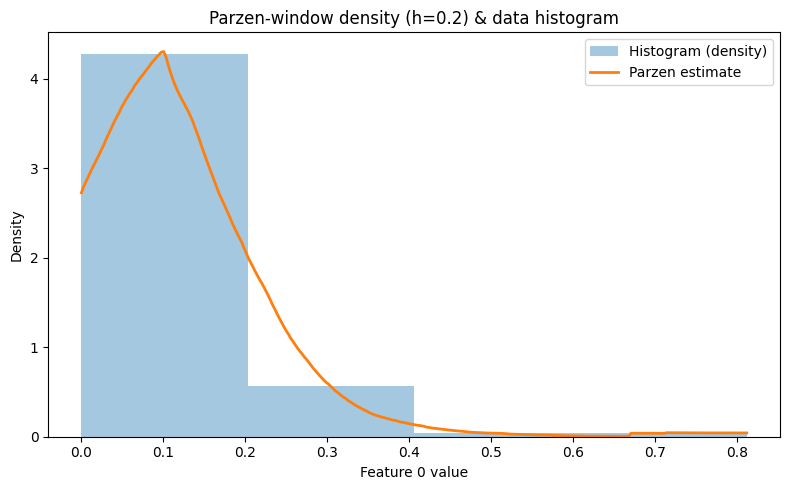

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def parzen_density(x_grid, data, h):

    N = len(data)
    # for each x in x_grid, count how many data points lie within ±h/2
    counts = np.array([
        np.sum(np.abs(data - x) < (h/2))
        for x in x_grid
    ])
    return counts / (N * h)

h           = 0.2                    # window width
feature_idx = 0                      # which feature to pick
data        = X_train[:, feature_idx]  # your 1-D array of samples

x_min, x_max = data.min(), data.max()
x_grid       = np.linspace(x_min, x_max, 300)

p_hat = parzen_density(x_grid, data, h)

plt.figure(figsize=(8, 5))

plt.hist(
    data,
    bins=int((x_max - x_min) / h),
    range=(x_min, x_max),
    density=True,
    alpha=0.4,
    label='Histogram (density)'
)

# Parzen‐window density
plt.plot(x_grid, p_hat, lw=2, label='Parzen estimate')

plt.title(f'Parzen‐window density (h={h}) & data histogram')
plt.xlabel(f'Feature {feature_idx} value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


##Multivariate Gaussian‐kernel density estimator classifier

Gaussian‐KDE classifier accuracy (h=0.5): 0.784


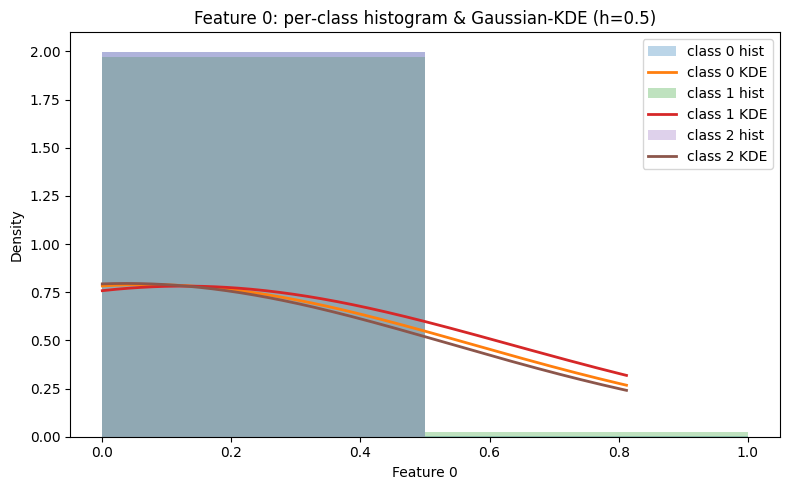

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def gaussian_scores(x, X_train, y_train, classes, h):
    d      = X_train.shape[1]
    const  = (2 * np.pi) ** (-d / 2)
    g_vals = np.empty(len(classes), dtype=float)

    for i, c in enumerate(classes):
        X_c = X_train[y_train == c]
        N_c = len(X_c)
        # compute u = (x - X_c) / h
        U = (x[None, :] - X_c) / h  # shape (N_c, d)
        # Gaussian kernel values
        K_vals = const * np.exp(-0.5 * np.sum(U**2, axis=1))
        # density & prior
        p_x_given_c = np.sum(K_vals) / (N_c * (h**d))
        p_c         = N_c / len(X_train)
        g_vals[i]   = p_x_given_c * p_c

    return g_vals


h       = 0.5                        # bandwidth
classes = np.unique(y_train)

y_pred = np.array([
    classes[np.argmax(gaussian_scores(x, X_train, y_train, classes, h))]
    for x in X_test
])

acc = accuracy_score(y_test, y_pred)
print(f'Gaussian‐KDE classifier accuracy (h={h}): {acc:.3f}')

feature_idx = 0
data_min, data_max = X_train[:, feature_idx].min(), X_train[:, feature_idx].max()
bin_edges = np.arange(data_min, data_max + h, h)
x_grid    = np.linspace(data_min, data_max, 300)

plt.figure(figsize=(8, 5))
for c in classes:
    data_c = X_train[y_train == c, feature_idx]
    # translucent histogram
    plt.hist(
        data_c,
        bins=bin_edges,
        density=True,
        alpha=0.3,
        label=f'class {c} hist'
    )
    # KDE curve for this class
    # 1D Gaussian kernel: K(u) = (2π)^(-1/2) exp(-u^2/2)
    kernel_const = (2 * np.pi) ** (-0.5)
    # evaluate density on x_grid
    diffs = (x_grid[:, None] - data_c[None, :]) / h
    Kvals = kernel_const * np.exp(-0.5 * diffs**2)
    p_hat = np.sum(Kvals, axis=1) / (len(data_c) * h)
    plt.plot(x_grid, p_hat, lw=2, label=f'class {c} KDE')

plt.title(f'Feature {feature_idx}: per‐class histogram & Gaussian‐KDE (h={h})')
plt.xlabel(f'Feature {feature_idx}')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


##knn_density

<ipython-input-75-bceba604a54d>:19: RuntimeWarning: divide by zero encountered in scalar divide
  p_hat[i] = k / (2 * N * d_k)


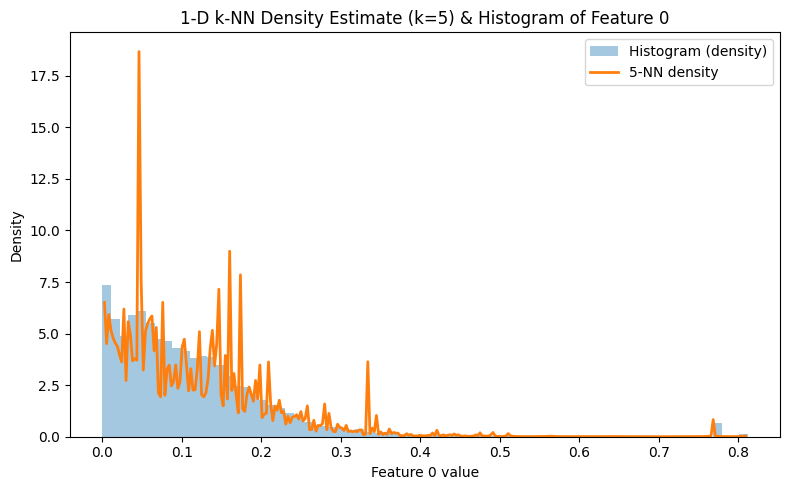

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def knn_density(x_grid, data, k):

    N = len(data)
    p_hat = np.empty_like(x_grid)
    for i, x in enumerate(x_grid):
        # absolute distances from x to all points
        dists = np.abs(data - x)
        # kth‐smallest distance (zero‐based index k)
        d_k   = np.partition(dists, k)[k]
        # density estimate
        p_hat[i] = k / (2 * N * d_k)
    return p_hat


feature_idx = 0                        # which feature to plot
data        = X_train[:, feature_idx]  # (N,) array
k           = 5                        # your choice of neighbors


# grid for plotting the density curve
x_min, x_max = data.min(), data.max()
x_grid       = np.linspace(x_min, x_max, 300)


# compute k-NN density on that grid
p_knn = knn_density(x_grid, data, k)


plt.figure(figsize=(8, 5))

# histogram scaled to form a density
plt.hist(
    data,
    bins=int((x_max - x_min) / (2 * (x_max-x_min)/np.sqrt(len(data)))),  # ~Scott’s rule
    range=(x_min, x_max),
    density=True,
    alpha=0.4,
    label='Histogram (density)'
)

# k-NN density curve
plt.plot(x_grid, p_knn, lw=2, label=f'{k}-NN density')

plt.title(f'1-D k-NN Density Estimate (k={k}) & Histogram of Feature {feature_idx}')
plt.xlabel(f'Feature {feature_idx} value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


##knn_gaussian_density

<ipython-input-76-14635f4f0cd0>:22: RuntimeWarning: divide by zero encountered in divide
  u     = (x - data) / d_k
<ipython-input-76-14635f4f0cd0>:22: RuntimeWarning: invalid value encountered in divide
  u     = (x - data) / d_k


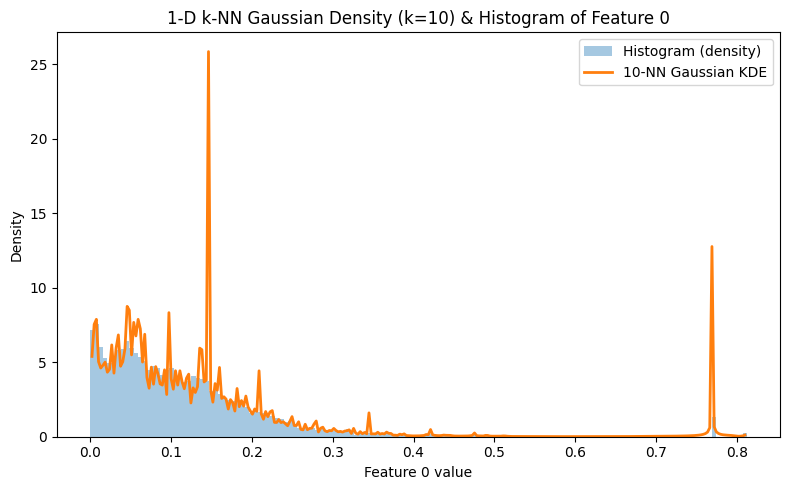

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def knn_gaussian_density(x_grid, data, k):

    N = len(data)
    # Gaussian kernel constant for 1D
    K_const = (2 * np.pi) ** -0.5

    p_hat = np.empty_like(x_grid)
    for i, x in enumerate(x_grid):
        # distances to all points
        dists = np.abs(data - x)
        # distance to k-th neighbor (zero-based indexing)
        d_k   = np.partition(dists, k)[k]
        # scaled differences
        u     = (x - data) / d_k
        # kernel values
        K_vals = K_const * np.exp(-0.5 * u**2)
        # density estimate
        p_hat[i] = np.sum(K_vals) / (N * d_k)
    return p_hat


feature_idx = 0                        # which feature to visualize
data        = X_train[:, feature_idx]  # your 1-D samples
k           = 10                       # number of neighbors

# grid for plotting
x_min, x_max = data.min(), data.max()
x_grid       = np.linspace(x_min, x_max, 300)

# compute k-NN Gaussian density
p_knn_gauss = knn_gaussian_density(x_grid, data, k)


plt.figure(figsize=(8, 5))

# overlay histogram as density
plt.hist(
    data,
    bins=int((x_max - x_min) / ( (x_max-x_min) / np.sqrt(len(data)) )),  # ~Scott’s rule
    range=(x_min, x_max),
    density=True,
    alpha=0.4,
    label='Histogram (density)'
)

# k-NN Gaussian density curve
plt.plot(x_grid, p_knn_gauss, lw=2, label=f'{k}-NN Gaussian KDE')

plt.title(f'1-D k-NN Gaussian Density (k={k}) & Histogram of Feature {feature_idx}')
plt.xlabel(f'Feature {feature_idx} value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


##10‐fold CV setup

10-fold CV on TRAINING SET:
  Histogram      : 0.122 ± 0.007
  Naïve Hist     : 0.786 ± 0.006
  Parzen-Window  : 0.772 ± 0.007
  Gaussian KDE   : 0.774 ± 0.008
  k-NN Density   : 0.774 ± 0.008
  k-NN Gaussian  : 0.600 ± 0.010

Final evaluation on TEST SET:
  Histogram      : 0.132
  Naïve Hist     : 0.784
  Parzen-Window  : 0.772
  Gaussian KDE   : 0.774
  k-NN Density   : 0.774
  k-NN Gaussian  : 0.582


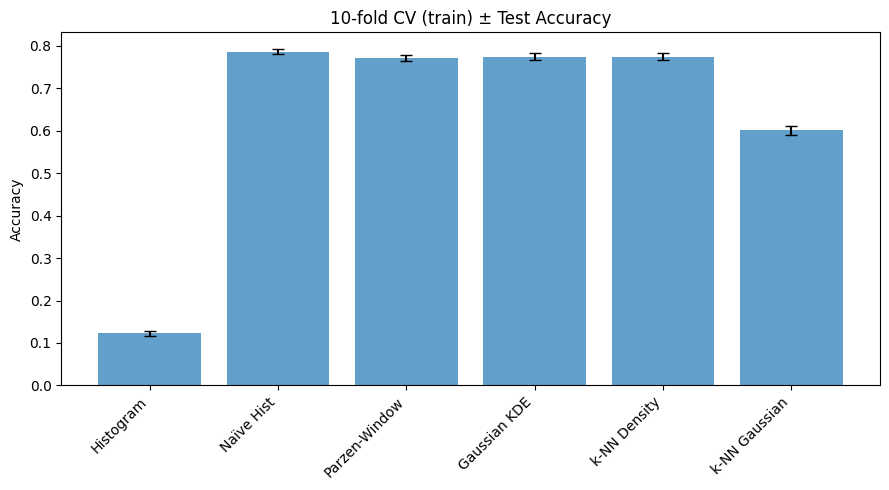

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics       import accuracy_score

def histogram_scores(x, X_tr, y_tr, classes, h):
    d = X_tr.shape[1]
    # bin index of test‐point
    b = tuple(np.floor(x/h).astype(int))
    g = np.empty(len(classes))
    for i,c in enumerate(classes):
        Xc = X_tr[y_tr==c]
        Nc = len(Xc)
        # count how many fall in same bin
        matches = np.all(np.floor(Xc/h).astype(int)==b, axis=1)
        k = matches.sum()
        p_x_c = k / (Nc * (h**d))
        p_c   = Nc / len(X_tr)
        g[i]  = p_x_c * p_c
    return g

def naive_histogram_scores(x, X_tr, y_tr, classes, h):
    d = X_tr.shape[1]
    g = np.empty(len(classes))
    for i,c in enumerate(classes):
        Xc = X_tr[y_tr==c]
        Nc = len(Xc)
        prod = 1.0
        for j in range(d):
            b = int(np.floor(x[j]/h))
            k = np.sum(np.floor(Xc[:,j]/h).astype(int)==b)
            prod *= k/(Nc*h)
        p_c = Nc/len(X_tr)
        g[i] = prod * p_c
    return g

def parzen_scores(x, X_tr, y_tr, classes, h):
    d = X_tr.shape[1]
    g = np.empty(len(classes))
    for i,c in enumerate(classes):
        Xc = X_tr[y_tr==c]
        Nc = len(Xc)
        # count how many in the h‐cube
        inside = np.all(np.abs(Xc - x) <= h/2, axis=1)
        k = inside.sum()
        p_x_c = k / (Nc * (h**d))
        p_c   = Nc / len(X_tr)
        g[i]  = p_x_c * p_c
    return g

def gaussian_scores(x, X_tr, y_tr, classes, h):
    d     = X_tr.shape[1]
    C     = (2*np.pi)**(-d/2)
    g     = np.empty(len(classes))
    for i,c in enumerate(classes):
        Xc = X_tr[y_tr==c]
        Nc = len(Xc)
        U  = (x[None,:] - Xc)/h
        Kt = C * np.exp(-0.5*(U**2).sum(axis=1))
        p_x_c = Kt.sum() / (Nc * (h**d))
        p_c   = Nc / len(X_tr)
        g[i]  = p_x_c * p_c
    return g

def predict_histogram(X_tr, y_tr, X_te, h):
    cls = np.unique(y_tr)
    return np.array([ cls[np.argmax(histogram_scores(x,X_tr,y_tr,cls,h))]
                      for x in X_te ])

def predict_naive(X_tr, y_tr, X_te, h):
    cls = np.unique(y_tr)
    return np.array([ cls[np.argmax(naive_histogram_scores(x,X_tr,y_tr,cls,h))]
                      for x in X_te ])

def predict_parzen(X_tr, y_tr, X_te, h):
    cls = np.unique(y_tr)
    return np.array([ cls[np.argmax(parzen_scores(x,X_tr,y_tr,cls,h))]
                      for x in X_te ])

def predict_kde(X_tr, y_tr, X_te, h):
    cls = np.unique(y_tr)
    return np.array([ cls[np.argmax(gaussian_scores(x,X_tr,y_tr,cls,h))]
                      for x in X_te ])

def predict_knn_density(X_tr, y_tr, X_te, k):
    d    = X_tr.shape[1]
    cls  = np.unique(y_tr)
    ypred = []
    eps = 1e-12
    for x in X_te:
        best_c, best_val = None, -np.inf
        for c in cls:
            Xc = X_tr[y_tr==c]
            dists = np.linalg.norm(Xc - x, axis=1)
            dk    = np.partition(dists, k)[k]
            # score ~ N_c/(d_k^d)
            val = len(Xc) / ((dk**d) + eps)
            if val > best_val:
                best_val, best_c = val, c
        ypred.append(best_c)
    return np.array(ypred)

def predict_knn_gaussian(X_tr, y_tr, X_te, k):
    d     = X_tr.shape[1]
    C     = (2*np.pi)**(-d/2)
    cls   = np.unique(y_tr)
    ypred = []
    eps   = 1e-12
    for x in X_te:
        best_c, best_val = None, -np.inf
        for c in cls:
            Xc = X_tr[y_tr==c]
            dists = np.linalg.norm(Xc - x, axis=1)
            dk    = np.partition(dists, k)[k]
            U     = (x[None,:] - Xc)/ (dk + eps)
            Kt    = C * np.exp(-0.5*(U**2).sum(axis=1))
            # score ~ sum(K)/dk
            val = Kt.sum() / (dk + eps)
            if val > best_val:
                best_val, best_c = val, c
        ypred.append(best_c)
    return np.array(ypred)

kf      = KFold(n_splits=10, shuffle=True, random_state=42)
methods = [
    ("Histogram",     predict_histogram,   {"h":0.5}),
    ("Naïve Hist",    predict_naive,       {"h":0.5}),
    ("Parzen-Window", predict_parzen,      {"h":0.5}),
    ("Gaussian KDE",  predict_kde,         {"h":0.5}),
    ("k-NN Density",  predict_knn_density, {"k":5}),
    ("k-NN Gaussian", predict_knn_gaussian,{"k":5}),
]
cv_res = {name: [] for name,_,_ in methods}

for tr, val in kf.split(X_train):
    Xt, Xv = X_train[tr], X_train[val]
    yt, yv = y_train[tr], y_train[val]
    for name, fn, p in methods:
        if "h" in p:
            ypv = fn(Xt, yt, Xv, p["h"])
        else:
            ypv = fn(Xt, yt, Xv, p["k"])
        cv_res[name].append(accuracy_score(yv, ypv))


print("10-fold CV on TRAINING SET:")
for name in cv_res:
    arr = np.array(cv_res[name])
    print(f"  {name:15s}: {arr.mean():.3f} ± {arr.std():.3f}")

print("\nFinal evaluation on TEST SET:")
for name, fn, p in methods:
    if "h" in p:
        y_pred_test = fn(X_train, y_train, X_test, p["h"])
    else:
        y_pred_test = fn(X_train, y_train, X_test, p["k"])
    print(f"  {name:15s}: {accuracy_score(y_test, y_pred_test):.3f}")

means = [np.mean(cv_res[n]) for n,_,_ in methods]
stds  = [np.std (cv_res[n]) for n,_,_ in methods]
labels= [n for n,_,_ in methods]

plt.figure(figsize=(9,5))
plt.bar(labels, means, yerr=stds, capsize=4, alpha=0.7)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("10-fold CV (train) ± Test Accuracy")
plt.tight_layout()
plt.show()
